#  - Portfolio Management


1. Tchawou Francky Kevin



# Step 1 - Gathering Data and Compute the covariance matrix from the observations.



In [208]:
import yfinance as yf
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt

# Download data
tickers = ['AAPL', 'AMZN', 'GOOGL', 'TSLA',  'MSFT']
stocks = tickers
start_date='2023-07-01'
end_date='2024-01-01'
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Compute daily returns
returns = data.pct_change().dropna()

# Compute covariance matrix
cov_matrix = returns.cov()


[*********************100%%**********************]  5 of 5 completed


In [209]:
returns

Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2023-07-05,-0.005871,0.001229,0.015430,0.000473,0.009506
2023-07-06,0.002509,-0.015493,-0.013470,0.009227,-0.021028
2023-07-07,-0.005891,0.011063,-0.005245,-0.011867,-0.007630
2023-07-10,-0.010856,-0.020419,-0.025360,-0.015984,-0.017564
2023-07-11,-0.002810,0.012979,0.005925,0.001929,0.000668
...,...,...,...,...,...
2023-12-22,-0.005547,-0.002730,0.007620,0.002784,-0.007701
2023-12-26,-0.002841,-0.000065,0.000212,0.000214,0.016116
2023-12-27,0.000518,-0.000456,-0.008126,-0.001575,0.018822


In [210]:
#print(cov_matrix)
# Convert the data into a DataFrame
df = pd.DataFrame(cov_matrix)

# Reassign the columns to avoid duplication
df.columns.name = None

# Print the cleaned DataFrame
print("Covariance Matrix:")
print(df.to_string(index=True))


Covariance Matrix:
            AAPL      AMZN     GOOGL      MSFT      TSLA
Ticker                                                  
AAPL    0.000141  0.000067  0.000090  0.000079  0.000140
AMZN    0.000067  0.000372  0.000186  0.000122  0.000206
GOOGL   0.000090  0.000186  0.000300  0.000074  0.000181
MSFT    0.000079  0.000122  0.000074  0.000179  0.000145
TSLA    0.000140  0.000206  0.000181  0.000145  0.000878


# Step 2: Markowitz Optimization


optimal weights
Optimal Portfolio Weights:
AAPL: -70.70%
AMZN: 25.87%
GOOGL: 83.35%
TSLA: 100.00%
MSFT: -38.51%


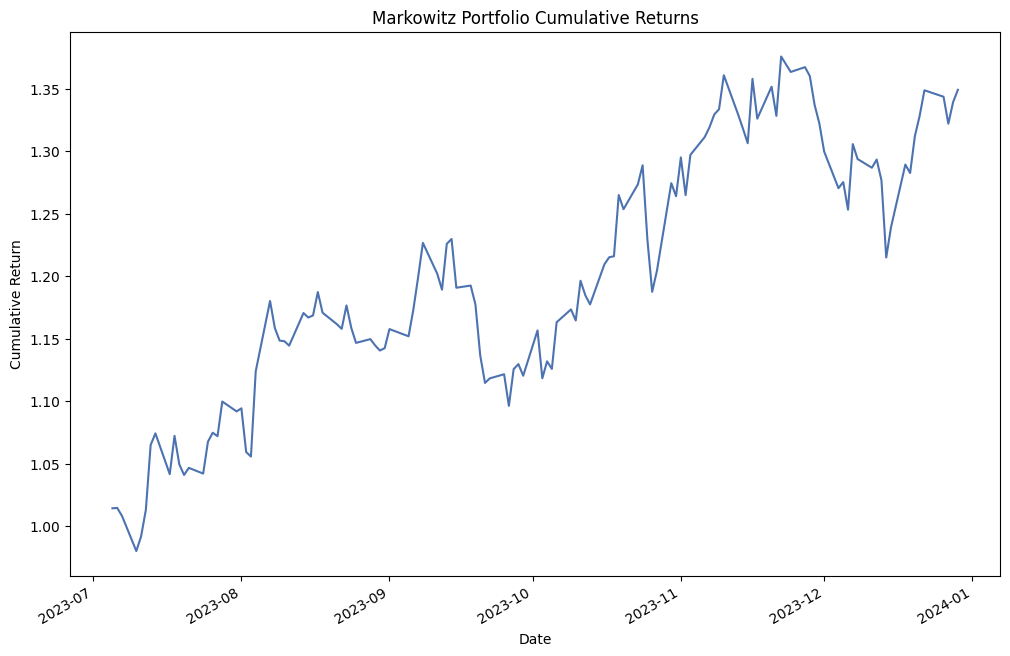

In [211]:
import yfinance as yf
import numpy as np
import pandas as pd
import cvxopt as opt
#import cvxopt.solvers as optsolvers
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import statsmodels.api as sm


# Markowitz Portfolio Optimization

# Function to calculate portfolio performance metrics
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(weights * mean_returns) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

# Objective function to minimize (negative Sharpe ratio)
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    std, returns = portfolio_performance(weights, mean_returns, cov_matrix)
    return -((returns - risk_free_rate) / std)

# Function to find the optimal portfolio
def optimize_portfolio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((-1, 1) for _ in range(num_assets))
    result = minimize(negative_sharpe_ratio, num_assets * [1. / num_assets,], args=args,
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Calculating mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()
risk_free_rate = 0.01

# Finding the optimal portfolio
optimal_portfolio = optimize_portfolio(mean_returns, cov_matrix, risk_free_rate)

# Optimal weights
optimal_weights = optimal_portfolio.x

print("optimal weights")
optimal_weights

print("Optimal Portfolio Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.2%}")

# Compute cumulative returns for Markowitz portfolio
markowitz_portfolio_returns = returns @ optimal_weights
markowitz_cumulative_returns = (1 + markowitz_portfolio_returns).cumprod()

markowitz_cumulative_returns.plot(figsize=(12, 8))
plt.title('Markowitz Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()

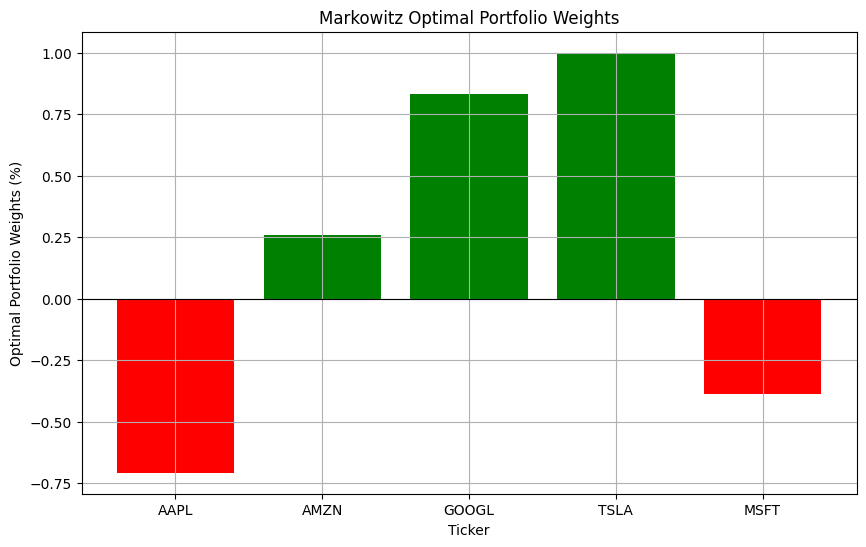

In [212]:

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(tickers, optimal_weights, color=['red' if w < 0 else 'green' for w in optimal_weights])
plt.xlabel('Ticker')
plt.ylabel('Optimal Portfolio Weights (%)')
plt.title('Markowitz Optimal Portfolio Weights')
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(True)
plt.show()


In [213]:
print("step 2 latest complete")

step 2 latest complete


#Step 2 Complete

#Step 3: Random Strategy Optimization

**Step 3.1 : 1/N portfolio strategy**

**Step 3.1.a: Use Monte Carlo simulation to allocate equally across randomly selected portfolios.**

In [214]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of simulations
num_simulations = 1000

# Initialize lists to store results
returns_list = []
volatilities_list = []
sharpe_ratios_list = []

# Define the risk-free rate for Sharpe Ratio calculation
risk_free_rate = 0

# Perform Monte Carlo simulation
for _ in range(num_simulations):
    # Generate random weights
    weights = np.random.random(len(returns.columns))
    weights /= np.sum(weights)  # Ensure weights sum to 1

    # Calculate portfolio returns
    portfolio_return = np.sum(returns.mean() * weights)
    returns_list.append(portfolio_return)

    # Calculate portfolio volatility
    covariance_matrix = returns.cov()
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    volatilities_list.append(portfolio_volatility)

    # Calculate Sharpe Ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    sharpe_ratios_list.append(sharpe_ratio)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Return': returns_list,
    'Volatility': volatilities_list,
    'Sharpe Ratio': sharpe_ratios_list
})

# Display summary statistics
print("Monte Carlo Simulation allocated equally across randomly selected portfolios - Summary Statistics:")
print(results_df.describe())


Monte Carlo Simulation allocated equally across randomly selected portfolios - Summary Statistics:
            Return   Volatility  Sharpe Ratio
count  1000.000000  1000.000000   1000.000000
mean      0.000678     0.013786      0.050436
std       0.000211     0.001525      0.017706
min       0.000005     0.010881      0.000265
25%       0.000535     0.012699      0.038323
50%       0.000676     0.013604      0.049528
75%       0.000833     0.014634      0.064477
max       0.001270     0.020862      0.090135


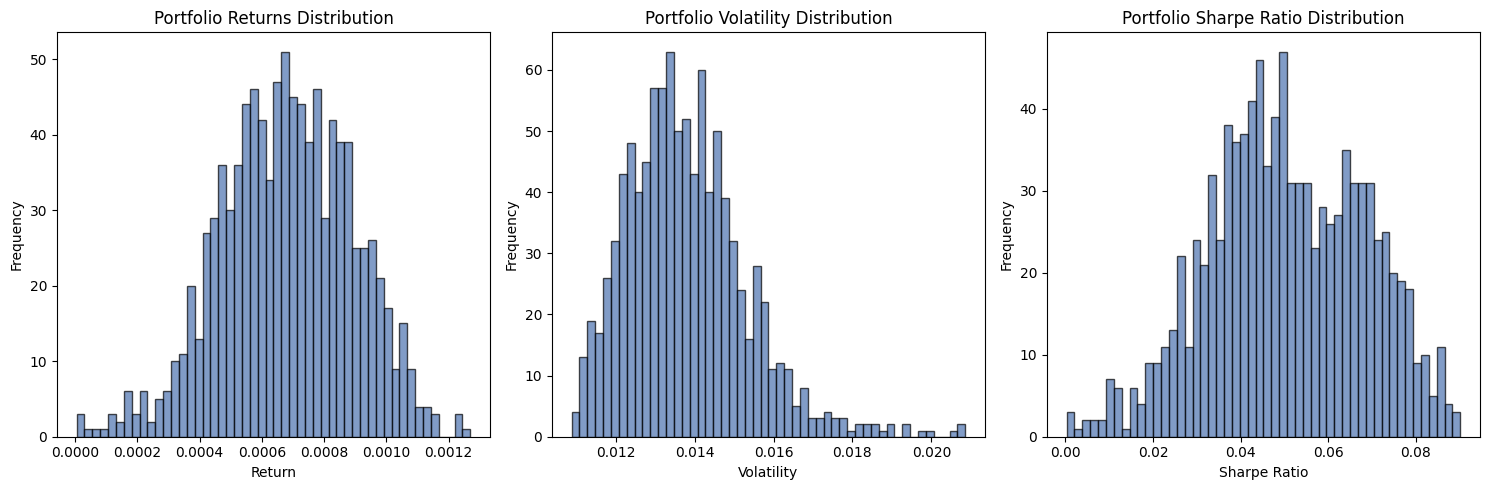

In [215]:
# Plot distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(results_df['Return'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Portfolio Returns Distribution')
plt.xlabel('Return')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(results_df['Volatility'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Portfolio Volatility Distribution')
plt.xlabel('Volatility')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(results_df['Sharpe Ratio'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Portfolio Sharpe Ratio Distribution')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Step3.1.b. Perform Historical Back-Tests to See How the Combined Portfolio Performs**

In [216]:
# Number of simulations and portfolios
num_simulations = 1000
num_portfolios = num_simulations

# Initialize list to store performance results
performance_results = []

# Simulate each portfolio and back-test
for i in range(num_portfolios):
    # Retrieve weights from Monte Carlo simulation
    weights = np.random.random(len(returns.columns))
    weights /= np.sum(weights)  # Normalize weights to sum to 1

    # Calculate portfolio returns
    portfolio_returns = np.dot(returns, weights)

    # Compute cumulative returns
    cumulative_returns = (1 + portfolio_returns).cumprod() - 1

    # Calculate final performance metrics
    final_cumulative_return = cumulative_returns[-1]
    annualized_return = np.mean(portfolio_returns) * 252  # Assuming daily data
    portfolio_volatility = np.std(portfolio_returns) * np.sqrt(252)  # Annualize volatility
    sharpe_ratio = (annualized_return) / portfolio_volatility

    # Append results to the list
    performance_results.append({
        'Portfolio': i + 1,
        'Return': final_cumulative_return,
        'Volatility': portfolio_volatility,
        'Sharpe Ratio': sharpe_ratio
    })

# Convert list of results to DataFrame
backtest_results_df = pd.DataFrame(performance_results)

# Display summary statistics
print("Back-test Summary Statistics:")
print(backtest_results_df.describe())


Back-test Summary Statistics:
         Portfolio       Return   Volatility  Sharpe Ratio
count  1000.000000  1000.000000  1000.000000   1000.000000
mean    500.500000     0.074138     0.217652      0.788729
std     288.819436     0.029677     0.024233      0.280606
min       1.000000    -0.047028     0.170453     -0.069690
25%     250.750000     0.054354     0.200111      0.582346
50%     500.500000     0.073681     0.215685      0.773965
75%     750.250000     0.094274     0.230669      1.001348
max    1000.000000     0.157815     0.376608      1.459790


Version 1: Basic Monte Carlo Simulation

monte_carlo_simulation_basic: Generates portfolios with uniform random weights.

In [217]:
import numpy as np
import pandas as pd

def monte_carlo_simulation_basic(returns, num_portfolios=1000):
    n_assets = returns.shape[1]
    cumulative_returns = pd.DataFrame(index=returns.index)

    for i in range(num_portfolios):
        weights = np.random.rand(n_assets)
        weights /= np.sum(weights)  # Normalize to ensure weights sum to 1

        portfolio_returns = np.dot(returns, weights)
        cumulative_returns[i] = (1 + portfolio_returns).cumprod()

    return cumulative_returns


cumulative_returns_basic = monte_carlo_simulation_basic(returns)


<ipython-input-217-e7966e10aeea>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cumulative_returns[i] = (1 + portfolio_returns).cumprod()


Version 2: Monte Carlo Simulation with Constraints

monte_carlo_simulation_constraints: Generates portfolios with weights from a Dirichlet distribution.


In [218]:
def monte_carlo_simulation_constraints(returns, num_portfolios=1000):
    n_assets = returns.shape[1]
    cumulative_returns = pd.DataFrame(index=returns.index)

    for i in range(num_portfolios):
        weights = np.random.dirichlet(np.ones(n_assets))

        portfolio_returns = np.dot(returns, weights)
        cumulative_returns[i] = (1 + portfolio_returns).cumprod()

    return cumulative_returns


cumulative_returns_constraints = monte_carlo_simulation_constraints(returns)


<ipython-input-218-16498d6969dc>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cumulative_returns[i] = (1 + portfolio_returns).cumprod()


Version 3: Monte Carlo Simulation with Advanced Constraints

monte_carlo_simulation_advanced_constraints: Generates portfolios with Dirichlet-distributed weights, ensuring minimum weight constraints.

In [219]:
def monte_carlo_simulation_advanced_constraints(returns, num_portfolios=1000):
    n_assets = returns.shape[1]
    cumulative_returns = pd.DataFrame(index=returns.index)

    for i in range(num_portfolios):
        while True:
            weights = np.random.dirichlet(np.ones(n_assets))
            if np.all(weights >= 0.05):  # constraint example: For each asset Minimum weight of 5%
                break

        portfolio_returns = np.dot(returns, weights)
        cumulative_returns[i] = (1 + portfolio_returns).cumprod()

    return cumulative_returns


cumulative_returns_advanced_constraints = monte_carlo_simulation_advanced_constraints(returns)


<ipython-input-219-327deb7efc7d>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cumulative_returns[i] = (1 + portfolio_returns).cumprod()


**Back Testing for all 3 versions**

 Version 1: Basic Monte Carlo Simulation

 Version 2: Monte Carlo Simulation with Constraints

 Version 3: Monte Carlo Simulation with Advanced Constraints

In [220]:
def backtest_cumulative_returns(cumulative_returns):
    final_cumulative_return = cumulative_returns.iloc[-1].mean() - 1  # Final cumulative return for each portfolio
    annualized_return = (1 + final_cumulative_return) ** (252 / len(cumulative_returns)) - 1  # Annualized return
    daily_returns = cumulative_returns.pct_change().dropna()
    volatility = daily_returns.std().mean()  # Average volatility
    average_return = daily_returns.mean().mean()  # Average return
    sharpe_ratio = average_return / volatility if volatility != 0 else np.nan  # Sharpe ratio

    return {
        'Final Cumulative Return': final_cumulative_return,
        'Annualized Return': annualized_return,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio
    }


metrics_basic = backtest_cumulative_returns(cumulative_returns_basic)
metrics_constraints = backtest_cumulative_returns(cumulative_returns_constraints)
metrics_advanced_constraints = backtest_cumulative_returns(cumulative_returns_advanced_constraints)

In [221]:
# Display results
metrics_df = pd.DataFrame({
    'Version 1 Basic Monte Carlo': metrics_basic,
    'Version 2 Constraints Monte Carlo': metrics_constraints,
    'Version 3 Advanced Constraints Monte Carlo': metrics_advanced_constraints
}).T
metrics_df = metrics_df.T
print("Performance Metrics Comparison:")
print(metrics_df)

Performance Metrics Comparison:
                         Version 1 Basic Monte Carlo  \
Final Cumulative Return                     0.075446   
Annualized Return                           0.157932   
Volatility                                  0.013891   
Sharpe Ratio                                0.046571   

                         Version 2 Constraints Monte Carlo  \
Final Cumulative Return                           0.073403   
Annualized Return                                 0.153500   
Volatility                                        0.014304   
Sharpe Ratio                                      0.044543   

                         Version 3 Advanced Constraints Monte Carlo  
Final Cumulative Return                                    0.074016  
Annualized Return                                          0.154829  
Volatility                                                 0.013930  
Sharpe Ratio                                               0.045774  


"Version 3 Advanced Constraints Monte Carlo" shows the highest final cumulative return and annualized return.

"Version 1 Basic Monte Carlo" has the lowest volatility, indicating less risk compared to the other versions.

"Version 3 Advanced Constraints Monte Carlo" has the highest Sharpe Ratio, suggesting it provides the best return per unit of risk.

"Version 3 Advanced Constraints Monte Carlo" performing slightly better in terms of return and Sharpe Ratio, while "Version 1 Basic Monte Carlo" has the lowest volatility.

" Version 2 Constraints Monte Carlo" appears to be less effective compared to "Version 1 Basic Monte Carlo" and "Version 3 Advanced Constraints Monte Carlo" in terms of return and risk-adjusted performance.

Text(0, 0.5, 'Cumulative Return')

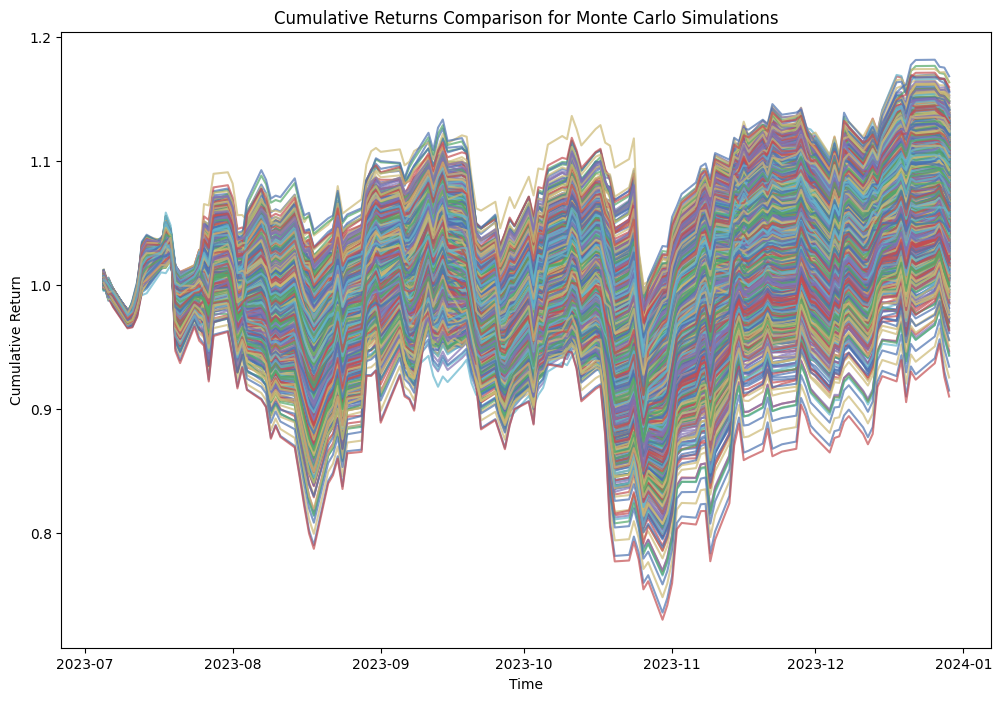

In [222]:
# Plot cumulative returns for visual comparison
plt.figure(figsize=(12, 8))

plt.plot(cumulative_returns_basic, alpha=0.7, label='Basic Monte Carlo')
plt.plot(cumulative_returns_constraints, alpha=0.7, label='Constraints Monte Carlo')
plt.plot(cumulative_returns_advanced_constraints, alpha=0.7, label='Advanced Constraints Monte Carlo')

plt.title('Cumulative Returns Comparison for Monte Carlo Simulations')
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
#plt.legend()
#plt.show()

In [223]:
print("step 3.1.a and 3.1.b latest complete")

step 3.1.a and 3.1.b latest complete


Step 3.2 Compare 1/N strategy with the Markowitz strategy

In [224]:
markowitz_cumulative_returns_3m = markowitz_cumulative_returns.loc[start_date:end_date]

In [225]:
print("Generate Random Portfolios:")
# Number of portfolios to simulate
num_portfolios = 1000
n = len(tickers)  # Number of securities

# Generate random portfolios with uniform distribution
random_weights = np.array([np.random.dirichlet(np.ones(n)) for _ in range(num_portfolios)])

print("Calculate Portfolio Returns and Risks:")
# Calculate expected returns and covariance matrix
returns_mean = returns.mean().values
cov_matrix = returns.cov().values

# Initialize arrays for portfolio returns and risks
portfolio_returns = np.zeros(num_portfolios)
portfolio_volatility = np.zeros(num_portfolios)

for i, weights in enumerate(random_weights):
    portfolio_returns[i] = np.dot(weights, returns_mean)
    portfolio_volatility[i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

Generate Random Portfolios:
Calculate Portfolio Returns and Risks:


In [226]:
print("Back-Test Portfolios:")
# Initialize a DataFrame for cumulative returns of each portfolio
cumulative_returns_random = pd.DataFrame(index=returns.index)

for i, weights in enumerate(random_weights):
    portfolio_returns = returns.dot(weights)
    cumulative_returns_random[i] = (1 + portfolio_returns).cumprod()

# Average cumulative returns for random portfolios
average_random_cumulative_returns = cumulative_returns_random.mean(axis=1)
average_random_cumulative_returns.head()

Back-Test Portfolios:


<ipython-input-226-979dea141234>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cumulative_returns_random[i] = (1 + portfolio_returns).cumprod()


Date
2023-07-05    1.004144
2023-07-06    0.996636
2023-07-07    0.992591
2023-07-10    0.974707
2023-07-11    0.978297
dtype: float64

In [227]:
#Note: we used 6 months data
cumulative_returns_random_3m = cumulative_returns_random.loc[start_date:end_date]

# Calculate average cumulative returns for random portfolios over the 3-month period
average_random_cumulative_returns_3m = cumulative_returns_random_3m.mean(axis=1)

In [228]:
def calculate_performance_metrics(cumulative_returns_df):
    final_cumulative_return = cumulative_returns_df.iloc[-1] - 1
    annualized_return = (1 + final_cumulative_return) ** (252 / len(cumulative_returns_df)) - 1
    daily_returns = cumulative_returns_df.pct_change().dropna()
    volatility = daily_returns.std().mean()
    average_return = daily_returns.mean()
    sharpe_ratio = average_return / volatility if volatility != 0 else np.nan

    return {
        'Final Cumulative Return': final_cumulative_return,
        'Annualized Return': annualized_return,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio
    }

# Calculate metrics for 3-month period
metrics_markowitz_3m = calculate_performance_metrics(markowitz_cumulative_returns_3m)
metrics_random_3m = calculate_performance_metrics(average_random_cumulative_returns_3m)


In [229]:
# Create a DataFrame for comparing the performance metrics
comparison_df = pd.DataFrame({
    'Markowitz Portfolio': metrics_markowitz_3m,
    '1/N Strategy Portfolio': metrics_random_3m
}).T

# Print the comparison DataFrame with formatted numbers
print(comparison_df.to_string(float_format='{:,.4f}'.format))

                        Final Cumulative Return  Annualized Return  Volatility  Sharpe Ratio
Markowitz Portfolio                      0.3493             0.8293      0.0212        0.1194
1/N Strategy Portfolio                   0.0742             0.1553      0.0133        0.0475


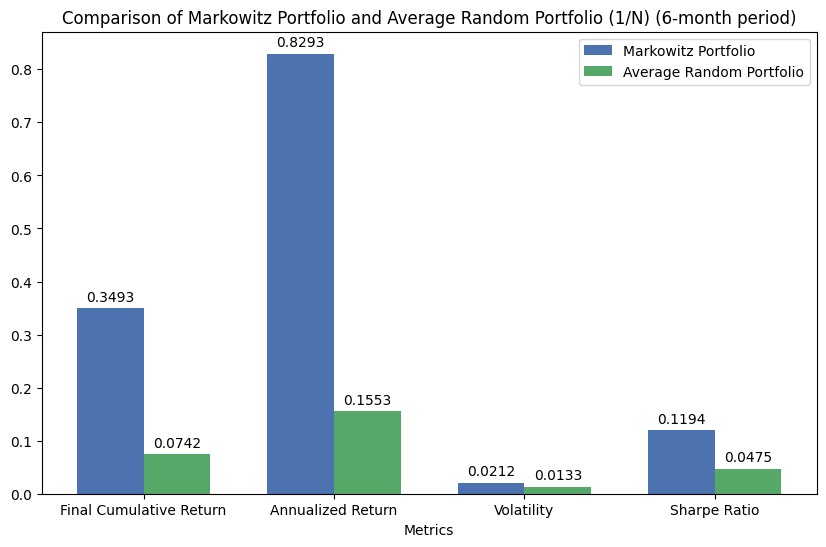

In [230]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the 3-month period
labels = ['Final Cumulative Return', 'Annualized Return', 'Volatility', 'Sharpe Ratio']
markowitz_3m = [metrics_markowitz_3m['Final Cumulative Return'], metrics_markowitz_3m['Annualized Return'], metrics_markowitz_3m['Volatility'], metrics_markowitz_3m['Sharpe Ratio']]
random_3m = [metrics_random_3m['Final Cumulative Return'], metrics_random_3m['Annualized Return'], metrics_random_3m['Volatility'], metrics_random_3m['Sharpe Ratio']]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, markowitz_3m, width, label='Markowitz Portfolio')
rects2 = ax.bar(x + width/2, random_3m, width, label='Average Random Portfolio')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_title('Comparison of Markowitz Portfolio and Average Random Portfolio (1/N) (6-month period)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.4f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


In [231]:
print("step 3.2 latest complete")

step 3.2 latest complete


In terms of final cumulative return and annualized return,  Markowitz Portfolio outperformed the 1/N Strategy Portfolio, suggesting that in generating higher returns the optimization process in the Markowitz Portfolio was effective.

Higher returns comes with higher risk and we notice the same here. The Markowitz Portfolio had higher volatility, indicating more risk compared to the 1/N Strategy Portfolio.

Compared to the 1/N Strategy Portfolio, the Markowitz Portfolio indicates that it provided better risk-adjusted returns, Sharpe Ratio being high.

Conclusion


The 1/N Strategy Portfolio, which allocates equal weights to all assets, provided lower returns and lower risk but did not perform as well on a risk-adjusted basis.

The Markowitz Portfolio, which uses mean-variance optimization, despite having higher volatility., showed superior performance both in absolute returns and risk-adjusted returns.

The results demonstrate the effectiveness of the Markowitz optimization approach in achieving higher returns and better risk-adjusted performance, at the cost of higher volatility. The 1/N Strategy, even though simpler and less risky, underperformed in comparison to Markowitz optimization.

# Step 4 Black Litterman Model

The Black-Litterman (BL) model considers views on the securities (prior estimate) to estimate the expected return on the securities (posterior estimate). In the following code, we will input the dataset of view on the stocks for further studies.

**Background Information**

This model was introduced in 1992 by Fischer Black and Robert Litterman. It is a powerful tool in the field of portfolio management, as it allows investors to integrate their opinions while respecting the asset allocation structure of the Markowitz mean-variance approach.

The Black-Litterman model is based on a modification of the Markowitz approach using a combination of investor forecasts and equilibrium market returns. The basic equations of the model (Market equilibrium yields) are :

$$E[R
m
​
 ]=Π+τ⋅diag(Ω)⋅P
T
 ⋅Ω
−1
 ⋅P$$
where:

  $E[R
m	​
 ]$ is the vector of market equilibrium returns

 $Π$ is the vector of implied market returns

 $τ$ is a confidence parameter for forecasts

 $Ω$ is the forecast covariance matrix.

  $P$ the matrix of investor views


The reason for starting with equilibrium returns in this way is that it gives us a "reasonable" set of expected return values, which are based on sound economic foundations
  
We then calculate the risk aversion coefficient, which we will write as d

d=  $(E⌈Rn⌉-rf)/(σ_m^2 )$   = $(SR_m)/σ_m$

with $rf$ which is the risk-free rate $(SR_m)$ is the sharpe ration and $σ_m$ is the volatility of portfolio market.

It should be remembered that the risk aversion coefficient plays a fundamental role in adjusting equilibrium market returns according to the investor's risk preference.

it is important to note that in most reference articles this coefficient is often between 2.15 and 2.65 in the context of our work we obtained a risk aversion coefficient of 2.2

We then integrated the different views of investors into our model. In our case, we have two absolute views and one relative view.
note that the balck-litterman model allows us to integrate the different views of investors. it is important to note that the relative views are those that tend to better represent the way managers see and think about different assets.

In the case of our study we have 8 assets and three views, hence N = 8 and K = 3. We therefore obtain a matrix P = 3 x 8 which is the representation of the matrix obtained in our work and Q a 3x1 which is also the representation of the matrix obtained earlier in our assignment.

*Model Calibration*

In terms of model calibration, it is important to remember that several factors can influence the performance of the black-litterman model in terms of quality.
- Implicit equilibrium return vector
-the view vector (Q)
- the scalar (tau)
- the uncertainty of the views (Ω)

It should be noted that the scalar and the uncertainty of opinions are the most difficult model parameters to specify.
the higher the level of certainty or confidence expressed by the manager in his opinions, the closer the new performance vector will be to these opinions.
Scalar tends to be defined in a number of different ways, depending on which well-known practitioner you choose to follow. for example we can
Set the scalar value to between 0.01 and 0.05, then calibrate the model to a target level of tracking error.
For our work we have set a tau value of 0.025

After calibrating the model we calculated the new yield vector based on our different views.

the rest is done by calculating the new black-litterman weight vectors

## Step 4.1: Constructing the Prior

In [232]:
mcaps = {}
for t in tickers:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
mcaps

{'AAPL': 3181762052096,
 'AMZN': 1690001473536,
 'GOOGL': 1969651843072,
 'TSLA': 635350024192,
 'MSFT': 2937165709312}

In [233]:
pip install PyPortfolioOpt

In [234]:
import pypfopt

from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

In [235]:
prices = data
prices

,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2023-07-03,191.443314,130.220001,119.762550,335.366547,279.820007
2023-07-05,190.319260,130.380005,121.610428,335.525299,282.480011
2023-07-06,190.796722,128.360001,119.972313,338.621063,276.540009
2023-07-07,189.672684,129.779999,119.343033,334.602509,274.429993
2023-07-10,187.613632,127.129997,116.316498,329.254333,269.609985
...,...,...,...,...,...
2023-12-22,193.091385,153.419998,141.327805,373.215393,252.539993
2023-12-26,192.542831,153.410004,141.357773,373.295135,256.609985
2023-12-27,192.642548,153.339996,140.209076,372.707275,261.440002


In [236]:
# Construct the prior
market_prices = yf.download("SPY", period="max")["Adj Close"]
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

[*********************100%%**********************]  1 of 1 completed


2.7000954060074482

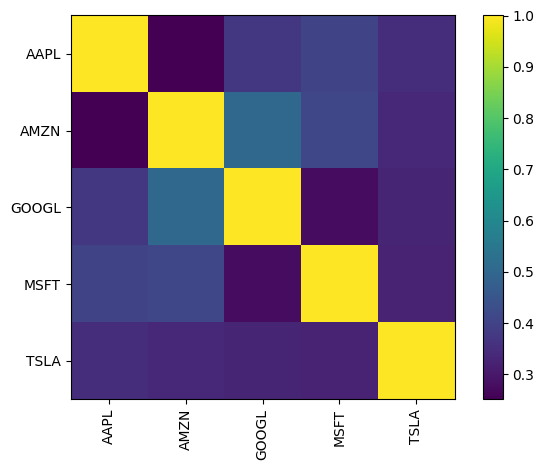

In [237]:
plotting.plot_covariance(S, plot_correlation=True);

In [238]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

AAPL     0.089394
AMZN     0.124079
GOOGL    0.114571
MSFT     0.098422
TSLA     0.147709
dtype: float64

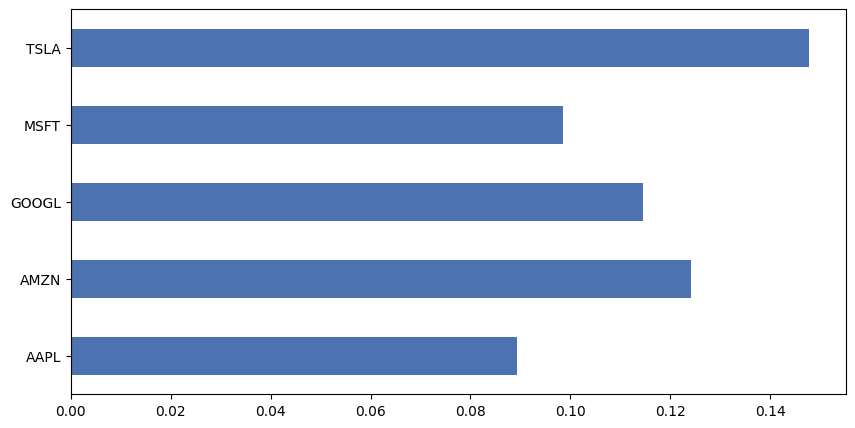

In [239]:
market_prior.plot.barh(figsize=(10,5));

## Step 4.2: Assigning Views

In Black-Litterman Model, views are indicated as matricx P (Picking Matrix) and vector Q (magnitude of the view). In the following, we are going to provide our views on individual stocks. Since there are advancing technology stocks, we think these stocks are going to increase 10% annually.

In [240]:
viewdict = {
    "AAPL": 0.10, # I think every stock will go up 10%
    "AMZN": 0.10,
    "GOOGL": 0.10,
    "MSFT": 0.10,
    "TSLA": 0.10
}

bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

## Step 4.3 Assign confidence

In [241]:
confidences = [
    0.5,
    0.5,
    0.5,
    0.5,
    0.5,
]

In [242]:
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)

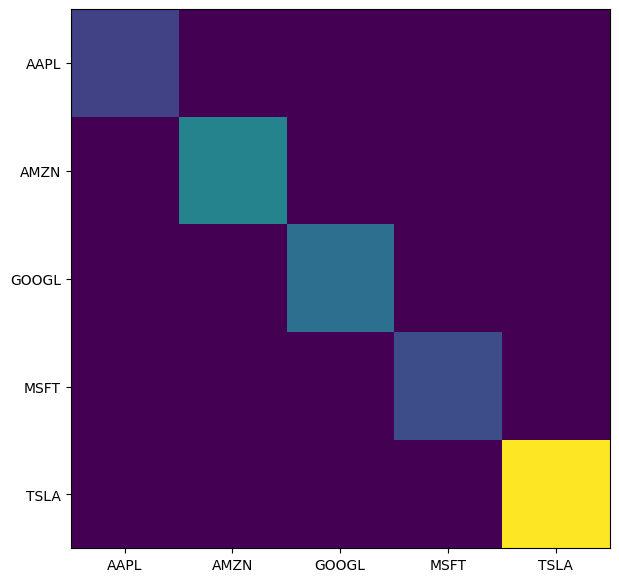

In [243]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(bl.omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [244]:
intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25)
]

In [245]:

variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print("variances")
print(variances)
print("omega")
omega = np.diag(variances)
print(omega)


variances
[0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005]
omega
[[0.015625 0.       0.       0.       0.      ]
 [0.       0.0225   0.       0.       0.      ]
 [0.       0.       0.015625 0.       0.      ]
 [0.       0.       0.       0.005625 0.      ]
 [0.       0.       0.       0.       0.0025  ]]


## Step 4.4 Posterior Estimates

In [246]:
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=omega)


# Posterior estimate of returns
ret_bl = bl.bl_returns()
print("posterior estimates")
ret_bl

posterior estimates


AAPL     0.071586
AMZN     0.103222
GOOGL    0.094324
MSFT     0.082975
TSLA     0.106966
dtype: float64

In [247]:
#Comparison on Prior, Posterior and Views
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
AAPL,0.089394,0.071586,0.1
AMZN,0.124079,0.103222,0.1
GOOGL,0.114571,0.094324,0.1
MSFT,0.098422,0.082975,0.1
TSLA,0.147709,0.106966,0.1


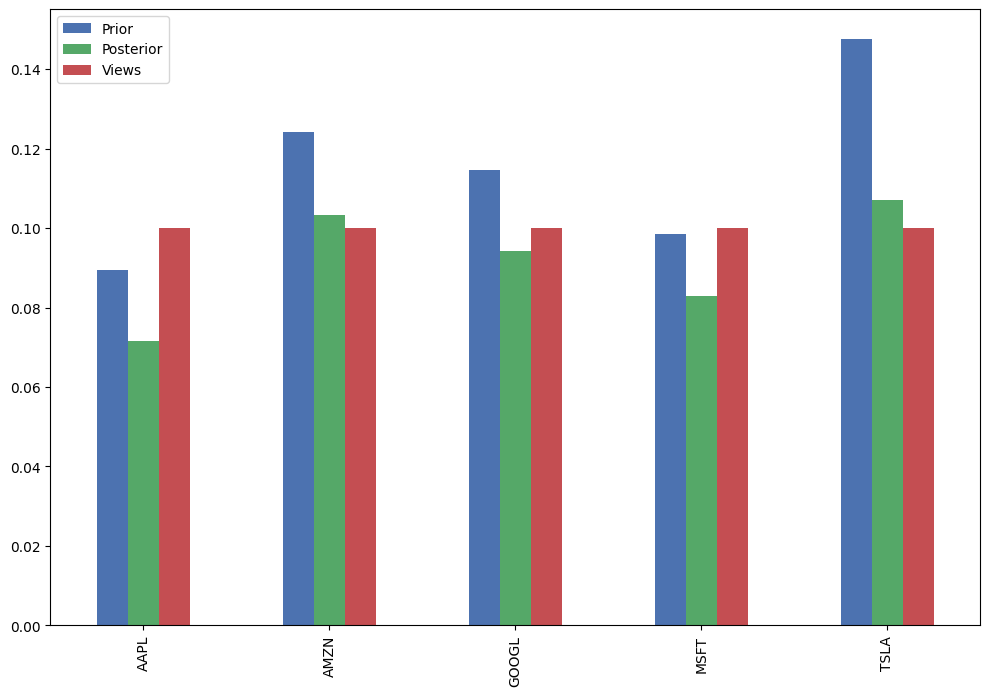

In [248]:
rets_df.plot.bar(figsize=(12,8));

covariance


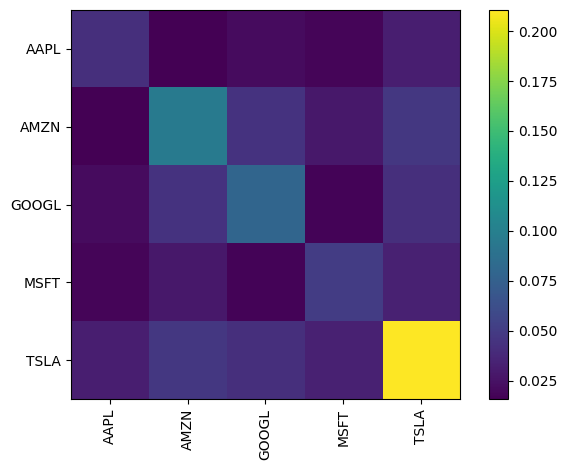

In [249]:
S_bl = bl.bl_cov()
print("covariance")
plotting.plot_covariance(S_bl);

## Step 4.5 Portfolio Allocation

In [250]:
from pypfopt import EfficientFrontier, objective_functions

In [251]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
BL_weights = ef.clean_weights()
BL_weights

/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('AAPL', 0.15096),
             ('AMZN', 0.23391),
             ('GOOGL', 0.21084),
             ('MSFT', 0.18495),
             ('TSLA', 0.21933)])

In [282]:
print("weights")
print(weights)
#pd.Series(weights).plot.pie(figsize=(10,10));
# Create a Pandas Series from weights dictionary
#weights_series = pd.Series(weights)

# Plot the pie chart with labels
#weights_series.plot.pie(figsize=(6, 6), labels=weights_series.index, autopct='%1.1f%%')

weights
[0.38467064 0.17186428 0.27210121 0.05587653 0.11548736]


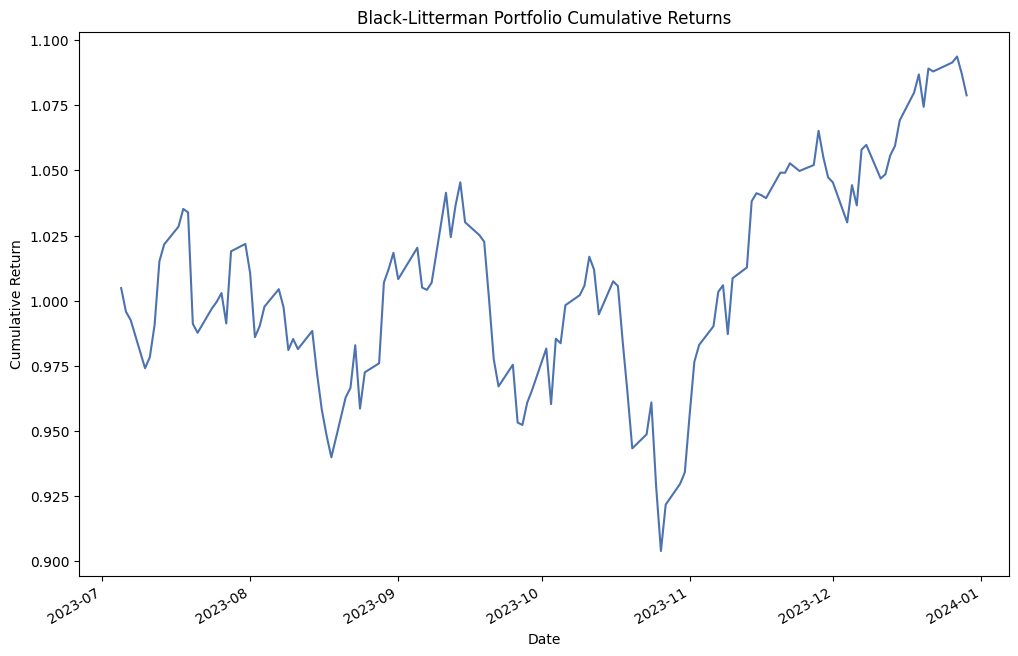

In [253]:
BL_weights_array = np.array(list(BL_weights.values()))


# Compute cumulative returns for Black Litterman Model
BL_portfolio_returns = returns @ BL_weights_array
BL_cumulative_returns = (1 + BL_portfolio_returns).cumprod()

BL_cumulative_returns.plot(figsize=(12, 8))
plt.title('Black-Litterman Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()

In [254]:
# Calculate metrics for 3-month period
def calculate_performance_metrics(cumulative_returns_df):
    final_cumulative_return = cumulative_returns_df.iloc[-1] -1
    annualized_return = (1 + final_cumulative_return) ** (252 / len(cumulative_returns_df)) -1
    daily_returns = cumulative_returns_df.pct_change().dropna()
    volatility = daily_returns.std().mean()
    average_return = daily_returns.mean()
    sharpe_ratio = average_return / volatility if volatility != 0 else np.nan

    return {
        'Final Cumulative Return': final_cumulative_return,
        'Annualized Return': annualized_return,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio
    }

metrics_BL_3m = calculate_performance_metrics(BL_cumulative_returns)
metrics_BL_3m


{'Final Cumulative Return': 0.07876710496771011,
 'Annualized Return': 0.1651510558233662,
 'Volatility': 0.013969681471970655,
 'Sharpe Ratio': 0.04794260616265144}

In [255]:
# Create a DataFrame for comparing the performance metrics
comparison_df_BL_3m = pd.DataFrame({
    'Black Litterman': metrics_BL_3m
}).T

# Print the comparison DataFrame with formatted numbers
print(comparison_df_BL_3m.to_string(float_format='{:,.4f}'.format))

                 Annualized Return  Final Cumulative Return  Sharpe Ratio  Volatility
Black Litterman             0.1652                   0.0788        0.0479      0.0140


In [256]:
# Create a DataFrame for comparing the performance metrics
comparison_df_2 = pd.DataFrame({
    'Markowitz Portfolio': metrics_markowitz_3m,
    'Black Litterman': metrics_BL_3m
}).T

# Print the comparison DataFrame with formatted numbers
print(comparison_df_2.to_string(float_format='{:,.4f}'.format))

                     Final Cumulative Return  Annualized Return  Volatility  Sharpe Ratio
Markowitz Portfolio                   0.3493             0.8293      0.0212        0.1194
Black Litterman                       0.0788             0.1652      0.0140        0.0479


# Step 5: Kelly Criterion

**Background information:**

Kelly Criterion is a most popular strategy that used in gambling bet and investment, with the objective of obtaining optimal allocation of the initial wealth for infinite payoff. We would like to introduce the key parameters that used for this model: Fraction and Expected Growth Rate coefficient. (Zachariah, 1)

There are two main branches in Kelly Criterion in terms of posive/negative sign of f.
1. 0 < f < 1 indicate no leverage and short selling on assets are allowed. The sum of the f among all the stocks are equal to 1.
2. f < 1, f > 1 indicate that leverage and short selling are allowed. The purpose is to epxloit the maximum return by leverage on margin. However, in this project, we were not allowing short-selling.


In this project, continuous probability distribution is used, as the subject that we studied on are stocks. The objective function is introduced to maximise the value of g(f). When n approaches to infinity, the objective function of g(f) can be expressed as:
$$
g_∞(f) = r + f(\mu-r)-\frac{f^2\sigma^2}{2}
$$


With the proven on the derivation of objective function and the aid of quantitative programming for maximisation of g(f), the optimal f for each asset is (Andrew, 4)

$$
f^* = \frac{(\mu - r)}{\sigma^2}
$$

In the following section, we will find out the optimal fraction allocation of the stock choices in two different case:
1. No leverage is allowed
2. Leverage is allowed, in both correlated and non-correlated case


## Step 5a No Leverage is allowed (0 < f < 1)

Pyomo as math programming model

In [257]:
pip install pyomo #For the Math Programming model

In [258]:
# Import relevant libraries
import yfinance as yf
import pandas as pd
import numpy as np
from pyomo.environ import * #To import function frm pyomo

import matplotlib.pyplot as plt

We are importing the daily closed price of the stocks selected: AAPL(Apple. Inc), AMZN (Amazon), GOOGL (Alphabet), TSLA (Tesla), MSFT (Microsoft) from 1 Jul 2023 to 1 Jan 2024 (6 months periods).

In [259]:
# Download data for 6 months period
#The data is reimported for different data format used in following calculation.
tickers = ['AAPL', 'AMZN', 'GOOGL', 'TSLA',  'MSFT']
stocks = ['AAPL', 'AMZN', 'GOOGL', 'TSLA',  'MSFT']
start_date='2023-07-01'
end_date='2024-01-01'
yfObj = yf.Tickers(tickers)
data_KC = yfObj.history(start=start_date, end=end_date)
data_KC.drop(['High', 'Low', 'Open', 'Volume', 'Stock Splits', 'Dividends'],
        axis=1, inplace=True)
data_KC.columns = data_KC.columns.swaplevel()
data_KC

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Price,Close,Close,Close,Close,Close
Date,,,,,
2023-07-03,191.443314,130.220001,119.762550,335.366547,279.820007
2023-07-05,190.319260,130.380005,121.610428,335.525299,282.480011
2023-07-06,190.796722,128.360001,119.972313,338.621063,276.540009
2023-07-07,189.672684,129.779999,119.343033,334.602509,274.429993
2023-07-10,187.613632,127.129997,116.316498,329.254333,269.609985
...,...,...,...,...,...
2023-12-22,193.091385,153.419998,141.327805,373.215393,252.539993
2023-12-26,192.542831,153.410004,141.357773,373.295135,256.609985


To start with the analysis, we will first define the objective function of calculating the maximmum growth function.

In [260]:
#To built objective function of kelly criterion
def buildKCOptModel(returns: np.array, varcov: np.matrix,
                    rfr: float = 0):
  assert returns.shape[0] == varcov.shape[0]
  assert returns.shape[0] == varcov.shape[1]

  #To use Concretemodel from pyomo to link the constraints, objective function adn variables together.
  m = ConcreteModel()

  # Set and Indices
  m.i = RangeSet(0, returns.shape[0] - 1)

  # Decision variables
  m.f = Var(m.i, domain=UnitInterval)

  # Parameters
  m.mu = Param(m.i,
               initialize={i: m for i, m in zip(m.i, returns)})
  m.sigma = Param(m.i, m.i,
                  initialize={(i, j): varcov[i, j]
                              for i in m.i
                              for j in m.i})

  # Adding constraint function to the model
  @m.Constraint()
  def fullyInvestedConstraint(m):
    return sum(m.f[i] for i in m.i) == 1

  # Objective Function
  @m.Objective(sense=maximize)
  def objective(m):
    return (rfr + sum(m.f[i] * (m.mu[i] - rfr) for i in m.i) - \
            sum(
                sum(m.f[i] * m.sigma[i, j] * m.f[j] for j in m.i)
            for i in m.i) / 2)

  return m

Import the package containing IPOpt.

In [261]:
#Next, we will define the function to import returns, means, variance and covariance for computing the objecive function
#Within the function, it involves qp calculation, which required IPOpt for Solver Factory

import sys
if "google.colab" in sys.modules:
    !wget "https://raw.githubusercontent.com/ndcbe/CBE60499/main/notebooks/helper.py"
    import helper
    helper.install_idaes()
    helper.install_ipopt()

--2024-08-05 23:01:56--  https://raw.githubusercontent.com/ndcbe/CBE60499/main/notebooks/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7171 (7.0K) [text/plain]
Saving to: ‘helper.py.2’

helper.py.2         100%[===================>]   7.00K  --.-KB/s    in 0s      

2024-08-05 23:01:56 (51.3 MB/s) - ‘helper.py.2’ saved [7171/7171]

IDAES found! No need to install.
Ipopt found! No need to install.
ipopt was successfully installed
k_aug was successfuly installed
cbc was successfuly installed
clp was successfuly installed
bonmin was successfuly installed
couenne was successfuly installed
ipopt_l1 was successfuly installed
 


We have 6 months of daily data for 5 stocks.
For lookback period, we will set it to 63 days (3 month-trading days) to inititalise means, covariance, means and variance, so we can get 3 months of optimal portfolio allocation. This is a way of **backtesting** using historical return.

In [262]:
def getKCOpt(data: pd.DataFrame, lookback=63, rfr=0):
  #To initialise means, var and cov
  returns = data.loc[:, (slice(None), 'Close')] / \
    data.loc[:, (slice(None), 'Close')].shift(1)
  returns = returns.rename(columns={'Close': 'returns'})
  means = returns.rolling(lookback).mean().rename(
    columns={'returns': 'mean'})
  var = returns.rolling(lookback).var().rename(
    columns={'returns': 'var'})
  df = pd.concat([returns, means, var], axis=1)

  # Get covariance matrices and transform to 3D array
  n = returns.shape[1]
  cov = returns.droplevel(1, axis=1).rolling(lookback).cov().values.reshape(
      -1, n, n)

  #To define frac and g
  fracs = np.zeros((df.shape[0], n))
  fracs[:] = np.nan
  g = np.zeros(df.shape[0])
  g[:] = np.nan

  #To reiniterate each row and
  for i, (ts, row) in enumerate(df.iterrows()):
    if i < lookback:
      continue
    means = row.loc[(slice(None), 'mean')].values
    var = row.loc[(slice(None), 'var')].values
    varcov = cov[i]
    np.fill_diagonal(varcov, var)
    model = buildKCOptModel(means, varcov, rfr)
    results = SolverFactory('ipopt').solve(model)
    fracs[i] = np.array([model.f[j].value for j in model.f])
    g[i] = model.objective.expr()

  df_fracs = pd.DataFrame(fracs, columns=returns.columns,
                          index=returns.index).rename(
                              columns={'returns': 'fraction'})
  df_g = pd.DataFrame(g, index=returns.index)
  df_g.columns = pd.MultiIndex.from_arrays(
      [['g'], ['g']])

  return pd.concat([data, df, df_fracs, df_g], axis=1)

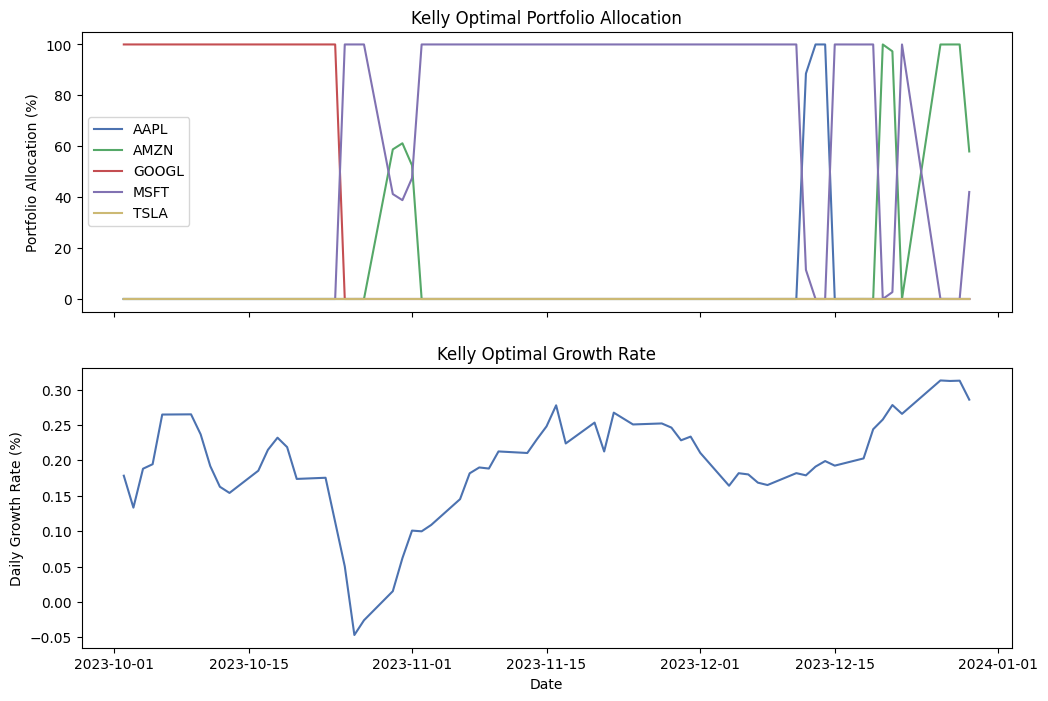

In [263]:
df = getKCOpt(data_KC)

fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)

ax[0].plot(df.loc[:, (slice(None), 'fraction')] * 100)
ax[0].set_ylabel('Portfolio Allocation (%)')
ax[0].set_title('Kelly Optimal Portfolio Allocation')
labels = [i for i in list(df.columns.levels[0]) if i in tickers]
ax[0].legend(labels=labels)


ax[1].plot((df.loc[:, 'g'] - 1) * 100)

ax[1].set_xlabel('Date')
ax[1].set_ylabel('Daily Growth Rate (%)')
ax[1].set_title('Kelly Optimal Growth Rate')

plt.show()

Explanation:
1. We can notice the growth rate is varies from -0.05 to 0.30.
2. Most of the moments when we are recommended to all-in on a type of stocks, instead of weighted allocating among the stocks.
3. We also noticed that was a depression in the end of October 2023.

In the next section, we will explore the maximum growth rate if we are allowed leverage on the stock (but not short-selling)

## Step 5b: Leverage is allowed

In [264]:
import seaborn as sns
from numba import njit, prange
from typing import Union, List

In [265]:
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Compute daily returns
returns = data.pct_change().dropna()
shift_returns = returns.shift(-1)

[*********************100%%**********************]  5 of 5 completed


<Axes: xlabel='Ticker', ylabel='Ticker'>

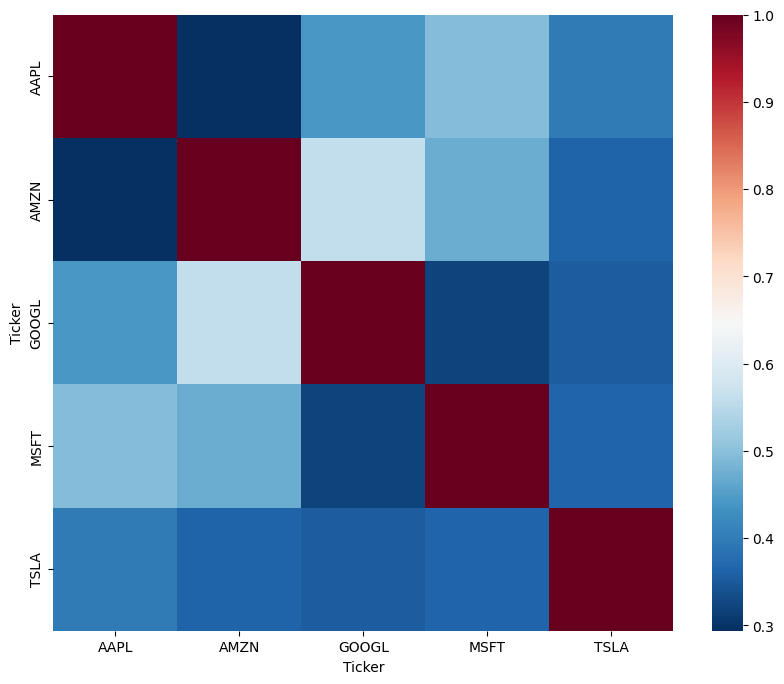

In [266]:
plt.figure(figsize=(10, 8))
sns.heatmap(returns.corr(), cmap="RdBu_r")

From the correlation matrix, it showed not close correlation between the stocks, except AMZN and GOOGL. However, we shall not underestimate the low correlation value. We shall look into both correlated and non-correlated case in the following session.

In [267]:
#Calculate the fraction kelly for both correlated and non-correlated case

def get_kelly(
    returns: Union[pd.DataFrame, pd.Series],
    window: int = 63,
    r: float = 0.00,
    correlation=False,
    days: int =126,
) -> pd.DataFrame:
    """Gets Kelly optimal investment fraction

    Parameters
    ----------
    returns : pd.DataFrame or pd.Series
        Series containing the daily returns of a security
    window : int, optional
        Minimum periods to calculate the parameters. Default 400.
    r : int, optional
        Risk-free yearly returns. Example: Treasury bills. Default 0.02.
    correlation : bool, optional
        If a portfolio of securities is given, indicate whether the
        securities are correlationated or not.
    days : int, optional
        Number of days to use. Default 250

    Returns
    -------
    kelly : pd.DataFrame
        Frame containing the corresponding kelly values for each security
    """
    #r_adjusted = (1 + r) ** (1 / days) - 1
    r_adjusted = r
    mean = returns.expanding(window).mean().dropna()
    return_exces = mean - r_adjusted

    if correlation:
        roll_cov = returns.expanding(window).cov().dropna()
        kelly = get_kelly_wrap(roll_cov, return_exces)
    else:
        var = returns.expanding(window).var().dropna()
        kelly = return_exces / var

    return kelly

#Sub-function from get_kelly
def get_kelly_wrap(cov_arr: pd.DataFrame, returns: pd.DataFrame) -> pd.DataFrame:
    """Wrapper around numba function to build kelly DataFrame

    Args:
        cov_arr (pd.DataFrame): DataFrame of covariances
        returns (pd.DataFrame): DataFrame of excess returns

    Returns:
        pd.DataFrame: Kelly values
    """

    # Get dimensions to reshape the array
    dim0 = len(cov_arr.index.get_level_values(0).unique())
    dim1 = len(cov_arr.index.get_level_values(1).unique())
    dim3 = cov_arr.shape[1]

    # Get array of kelly values
    kelly = get_kelly_numba(
        cov_arr.values.reshape(dim0, dim1, dim3), returns.values
    )

    # Return DataFrame
    return pd.DataFrame(kelly, columns=returns.columns, index=returns.index)

#Sub-function from get_kelly_wrap
@njit(cache=True)
def get_kelly_numba(
    cov_arr: np.ndarray[float], returns: np.ndarray[float]
) -> np.ndarray[float]:
    """Compute kelly values using numba for speed

    Args:
        cov_arr (np.ndarray[float]): array of covariances without NaNs
        returns (np.ndarray[float]): array of returns without NaNs

    Returns:
        np.ndarray[float]: array of kelly values
    """
    ret_covars = np.empty_like(cov_arr)
    kelly = np.empty_like(returns)
    for i in prange(cov_arr.shape[0]):
        # Use copies to avoid issues with non-contiguous arrays
        inv_cov = np.linalg.inv(cov_arr[i])
        ret_day = returns[i].copy()
        ret_covars[i] = inv_cov
        kelly[i] = np.dot(inv_cov, ret_day)
    return kelly

# f* values for correlated securities
opt_correlated_kelly = get_kelly(returns, correlation=True)

# f* values for uncorrelated securities
opt_uncorrelated_kelly = get_kelly(returns, correlation=False)

In [268]:
opt_correlated_kelly

Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2023-10-02,-14.980120,-4.888939,15.898211,0.341070,-0.865353
2023-10-03,-15.275016,-5.980161,16.197372,-1.275876,-0.479147
2023-10-04,-16.148150,-6.420300,17.044531,-0.697338,0.385667
2023-10-05,-15.255160,-6.744141,16.906491,-0.415742,0.206998
2023-10-06,-14.627830,-6.797370,17.722764,1.937258,-0.645784
...,...,...,...,...,...
2023-12-22,-4.002350,1.553007,5.125970,5.650169,-2.213287
2023-12-26,-4.396011,1.468489,5.154561,5.693945,-1.988229
2023-12-27,-4.254239,1.596309,4.684310,5.430020,-1.706748


In [269]:
opt_uncorrelated_kelly

Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2023-10-02,-8.262894,0.257875,7.144587,-3.397410,-1.300486
2023-10-03,-8.909767,-1.119229,6.296600,-5.280008,-1.630389
2023-10-04,-8.222261,-0.432528,7.373196,-3.777899,-0.599782
2023-10-05,-7.555991,-0.732219,7.298714,-3.681661,-0.666818
2023-10-06,-6.160017,-0.147967,8.231695,-1.704456,-0.637796
...,...,...,...,...,...
2023-12-22,0.986981,4.034353,4.938404,5.269316,-0.456109
2023-12-26,0.824945,4.032997,4.944193,5.279072,-0.305805
2023-12-27,0.854454,4.023073,4.715132,5.207659,-0.131140


In [270]:
# set parameters for the backtest
leverages = range(1, 6)
start_date = opt_correlated_kelly.index[0]
shift_returns = shift_returns[start_date:]

def backtest(
    kelly_df: pd.DataFrame, returns_df: pd.DataFrame, leverages: List[int]
) -> pd.DataFrame:
    """Backtests Kelly strategy

    Parameters
    ----------
    kelly_df : pd.DataFrame
        kelly optimal allocations for the securities
    returns_df : pd.DataFrame
        daily returns of the securities
    leverages : list
        list containing the number of leverages to study

    Returns
    -------
    total_returns : pd.DataFrame
    """

    total_returns = pd.DataFrame()

    for leverage in leverages:
        kelly_weights = kelly_df.copy()

        # restrict shortselling
        kelly_weights[kelly_weights < 0] = 0

        daily_weights_sum = kelly_weights.sum(axis=1)
        leverage_cond = daily_weights_sum > leverage

        kelly_weights[leverage_cond] = leverage * kelly_weights[leverage_cond].div(
            daily_weights_sum[leverage_cond], axis=0
        )

        name = "max_leverage_" + str(leverage)
        total_returns[name] = (returns_df * kelly_weights).sum(axis=1)

    return total_returns

# make the backtest
total_returns_corr = backtest(opt_correlated_kelly, shift_returns, leverages)
total_returns_uncorr = backtest(opt_uncorrelated_kelly, shift_returns, leverages)

In [271]:
n_companies = len(shift_returns.columns)
n_companies

5

Next, we will calculate the cummulative return for both cases
1. The stocks are divided equally weighted initially, and no exploitation on return are carried out (no further transaction is made)
2. The stocks are reinvested everyday based on the optimal fraction allocation calculated.

In [272]:
# invest once and don't touch it again

def get_cumulative_returns(
    returns: Union[pd.Series, pd.DataFrame]
) -> Union[pd.Series, pd.DataFrame]:
    """Gets cumulative returns

    Parameters
    ----------
    returns : pd.Series, pd.DataFrame

    Returns
    -------
    cum_returns : pd.Series, pd.DataFrame
    """

    cum_returns = (1 + returns).cumprod()
    cum_returns = cum_returns.dropna()

    return cum_returns

cum_returns_ew = get_cumulative_returns(shift_returns)
cum_returns_ew = cum_returns_ew / n_companies
invest_once_equally_weight = cum_returns_ew.sum(axis=1)

# reinvest every day
total_returns_corr['reinvest_equally_weight'] = shift_returns.sum(axis=1) / n_companies
total_returns_uncorr['reinvest_equally_weight'] = shift_returns.sum(axis=1) / n_companies

# cumulative returns for correlated securities
cum_returns_corr = get_cumulative_returns(total_returns_corr)
cum_returns_corr['invest_once_equally_weight'] = invest_once_equally_weight

# cumulative returns for uncorrelated securities
cum_returns_uncorr = get_cumulative_returns(total_returns_uncorr)
cum_returns_uncorr['invest_once_equally_weight'] = invest_once_equally_weight

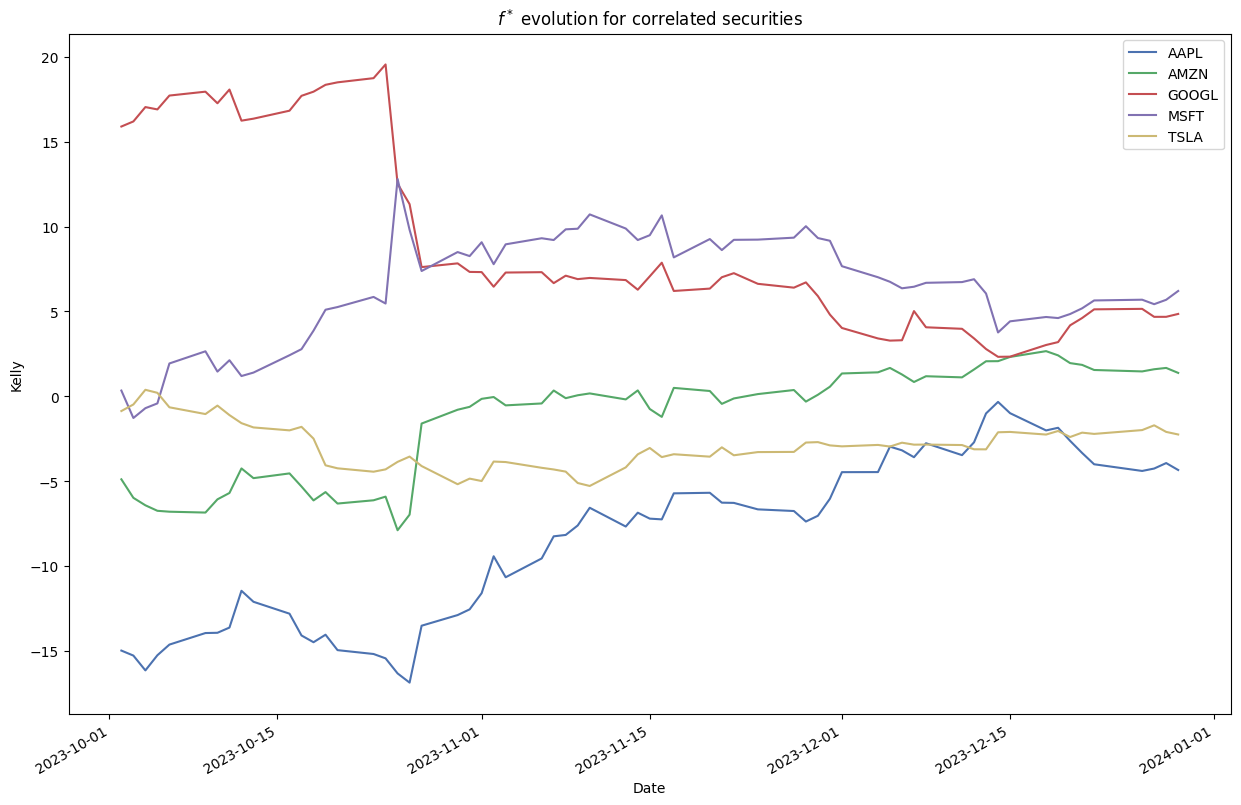

In [273]:
fig, ax = plt.subplots(nrows=1, figsize=(15, 10), sharex=True)

opt_correlated_kelly.plot(ax=ax)
ax.set_title('$f^*$ evolution for correlated securities');
ax.set_ylabel('Kelly');
labels = [i for i in list(returns.columns) if i in tickers]
ax.legend(labels=labels)

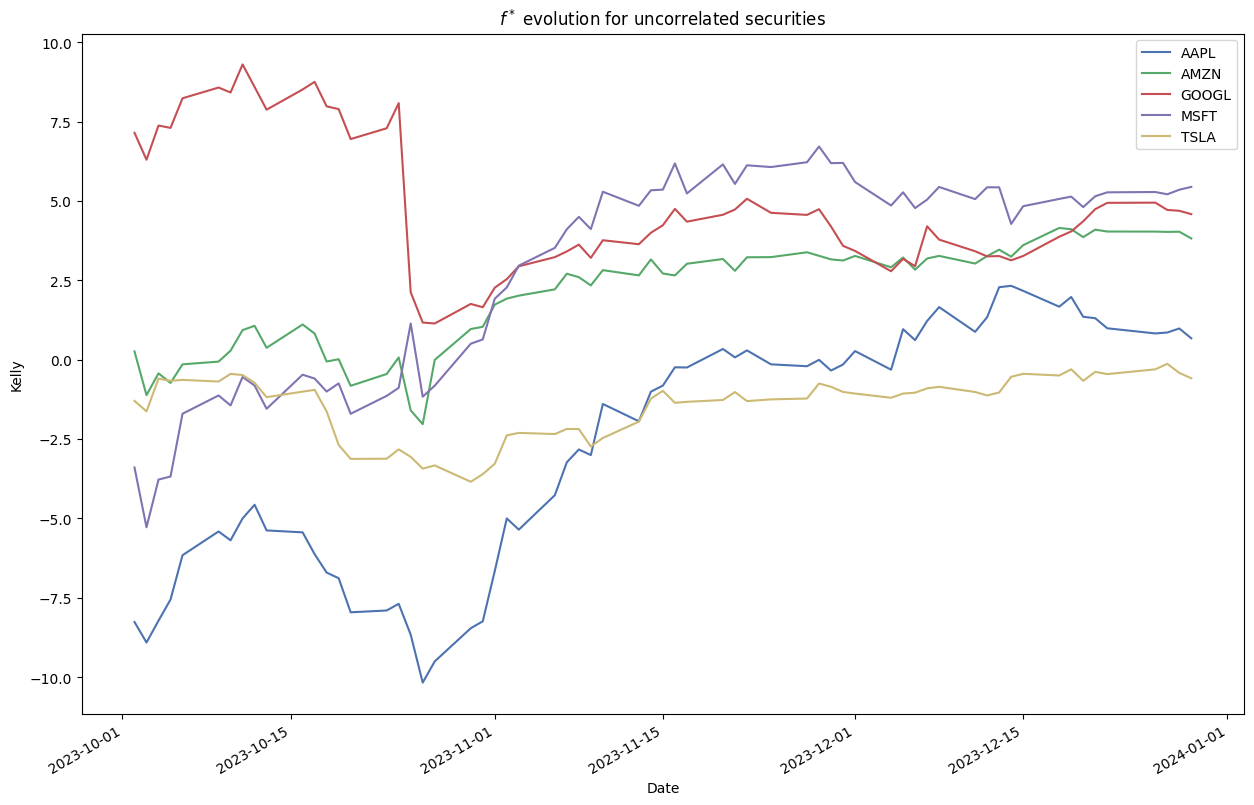

In [274]:
fig, ax = plt.subplots(nrows=1, figsize=(15, 10), sharex=True)

opt_uncorrelated_kelly.plot(ax=ax)
ax.set_title('$f^*$ evolution for uncorrelated securities');
ax.set_ylabel('Kelly');
labels = [i for i in list(returns.columns) if i in tickers]
ax.legend(labels=labels)

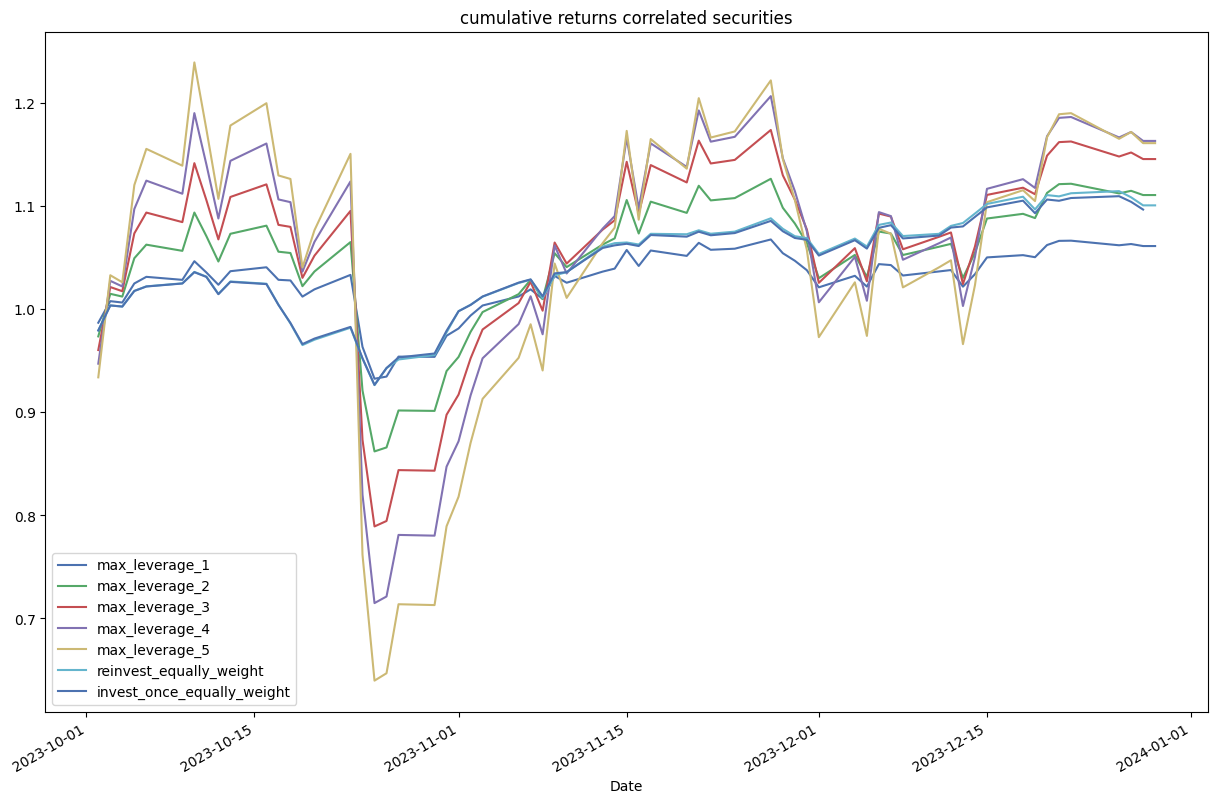

In [275]:
fig, ax = plt.subplots(nrows=1, figsize=(15, 10), sharex=True)

cum_returns_corr.plot(ax=ax)
ax.set_title('cumulative returns correlated securities');

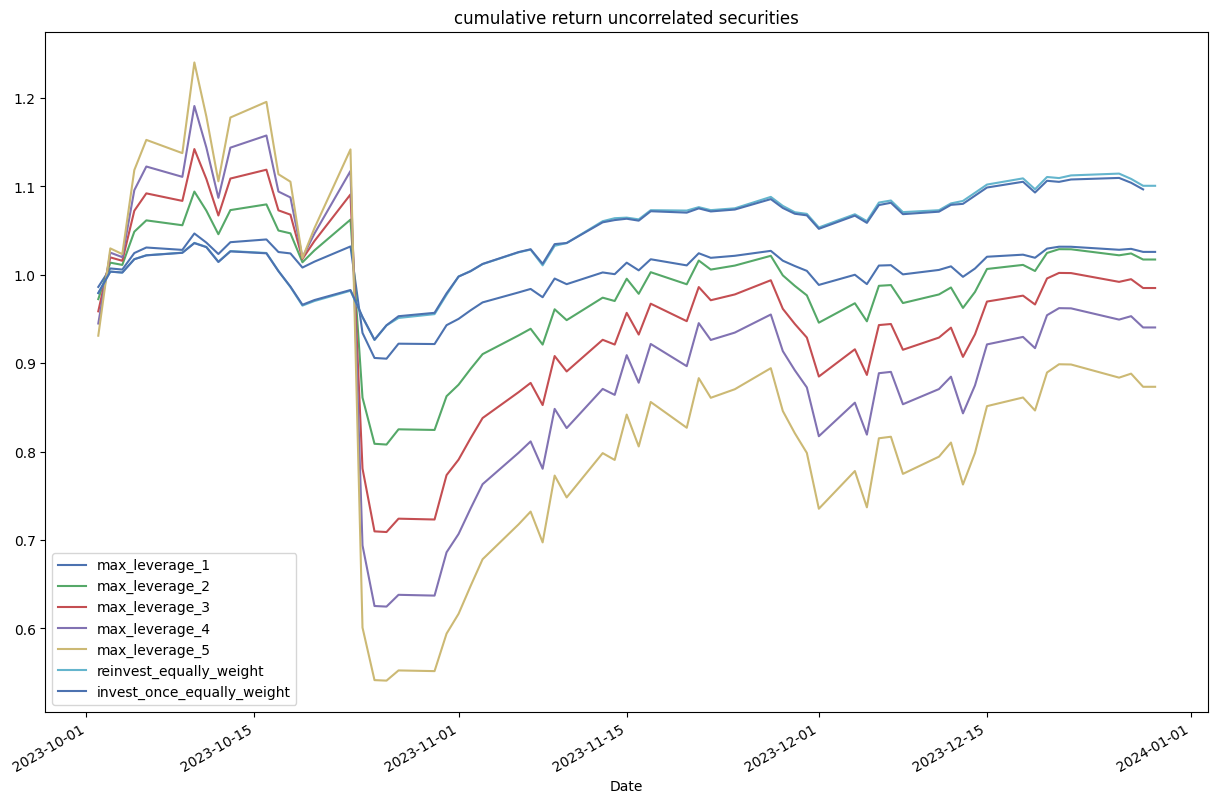

In [276]:
fig, ax = plt.subplots(nrows=1, figsize=(15, 10), sharex=True)

cum_returns_uncorr.plot(ax=ax)
ax.set_title('cumulative return uncorrelated securities');



In [277]:
cum_returns_corr_kelly_criterion = cum_returns_corr
cum_returns_uncorr_kelly_criterion = cum_returns_uncorr

In [278]:
def calculate_performance_metricsv2(cumulative_returns_df):
    final_cumulative_return = cumulative_returns_df.iloc[-2] -1
    annualized_return = (1 + final_cumulative_return) ** (252 / len(cumulative_returns_df)) -1
    daily_returns = cumulative_returns_df.pct_change().dropna()
    volatility = daily_returns.std().mean()
    average_return = daily_returns.mean()
    sharpe_ratio = average_return / volatility if volatility != 0 else np.nan

    return {
        'Final Cumulative Return': final_cumulative_return,
        'Annualized Return': annualized_return,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio
    }

# Calculate metrics for 3-month period
metrics_KCcorr_3m = calculate_performance_metricsv2(cum_returns_corr)
metrics_KCcorr_3m

<ipython-input-278-01064efa594e>:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = cumulative_returns_df.pct_change().dropna()


{'Final Cumulative Return': max_leverage_1                0.061166
 max_leverage_2                0.110646
 max_leverage_3                0.145561
 max_leverage_4                0.163169
 max_leverage_5                0.161011
 reinvest_equally_weight       0.100644
 invest_once_equally_weight    0.096571
 Name: 2023-12-28 00:00:00, dtype: float64,
 'Annualized Return': max_leverage_1                0.268041
 max_leverage_2                0.521610
 max_leverage_3                0.722155
 max_leverage_4                0.830508
 max_leverage_5                0.816961
 reinvest_equally_weight       0.467532
 invest_once_equally_weight    0.445930
 Name: 2023-12-28 00:00:00, dtype: float64,
 'Volatility': 0.03461768161493806,
 'Sharpe Ratio': max_leverage_1                0.036940
 max_leverage_2                0.073880
 max_leverage_3                0.110820
 max_leverage_4                0.147760
 max_leverage_5                0.184700
 reinvest_equally_weight       0.056650
 invest_once

Explanation:
1. First, by looking at the cumulative return of correlated and uncorrelated securites, we can

Comparison of all methods